In [213]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Pendulum-v0')
env._max_episode_steps = 600

In [219]:
def muestra_entorno(env):
    im = plt.imshow(env.render('rgb_array'))
    plt.show()

def get_random_state():
    angle = np.random.uniform(0,360)
    return [np.cos(angle), np.sin(angle), np.random.uniform(-8,8)]

# Discretizamos la acción de rango entre -2 y 2 en 40 valores

# def discretize_action(action):
#     return int(action/0.1)/10

# def discretize_state(state):
#     return [int(state[0]/0.1)/10, int(state[1]/0.1)/10, int(state[2]/0.1)/10]

In [239]:
# random state cos, sen y thetadot
env.reset()

array([-0.63256137, -0.77451024,  0.70144914])

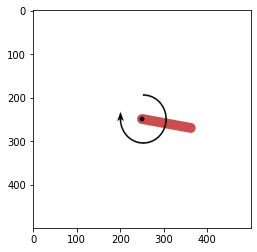

In [18]:
env.reset()

muestra_entorno(env)

env.close()

In [53]:

# discretize_action(env.action_space.sample())
discretize_state(env.reset())

[-0.3, -0.9, -0.3]

In [106]:
env.step([0.1, 0.1, -3.4])

env.state


array([-0.85314794, -0.5084647 ])

In [480]:
sample = env.action_space.sample()
observation, reward, done, info = env.step(sample)
print(f"Acción tomada: {sample} \n Estado: {observation} \n Reward: {reward} \n Hecho?: {done}")

Acción tomada: [0.5783843] 
 Estado: [ 0.46436966 -0.88564147  0.43237701] 
 Reward: -1.334782460313502 
 Hecho?: False


In [68]:
# Sarsa
def get_epsilon_greedy_action(q_values, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_values)

def sarsa(num_episodes = 500, ALPHA = 0.1, EPSILON = 0.25):
    q_values = np.zeros((env.observation_space.shape[0], env.action_space.shape[0]))
    rewards = []
    for i in range(num_episodes):
        state = env.reset() # Al resetear devuelve un estado aleatorio
        action = get_epsilon_greedy_action(q_values, EPSILON)
        done = False
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = get_epsilon_greedy_action(q_values, EPSILON)
            q_values[state, action] += ALPHA * (reward + q_values[next_state, next_action] - q_values[state, action])
            state = next_state
            action = next_action
        rewards.append(reward)
    return rewards

sarsa()

IndexError: invalid index to scalar variable.

In [112]:
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        # print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

In [115]:
# cos(theta), sin(angle), velocity
print(env.observation_space.high, env.observation_space.low)

[1. 1. 8.] [-1. -1. -8.]


[-0.9977795427937666, 0.06660318297395533, 2.5835321723249614]

In [204]:
np.random.sample(1)

array([0.83170744])